In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree

# Multiple Linear Regression - expense

## 2019

In [3]:
df_2019 = pd.read_csv("Expense_2019.csv")
df_2019

ID Shopping    Food Accommodation Transportation  \
0      11010550341_1000000        0  378000        316000         204000   
1      11010550341_1000005    30000       0             0              0   
2      11010550341_1000007    15000   70000         20000          97000   
3      11010550341_1000012        0   92010        180000          39990   
4      11010550341_1000013        0  285000        380000         320000   
...                    ...      ...     ...           ...            ...   
48264  39020620091_1382329   #NULL!  #NULL!        #NULL!         #NULL!   
48265  39020620091_1382420   #NULL!  #NULL!        #NULL!         #NULL!   
48266  39020620091_1382421    18000   30000         50000           2000   
48267  39020620091_1382423   #NULL!  #NULL!        #NULL!         #NULL!   
48268  39020620091_1382424   #NULL!  #NULL!        #NULL!         #NULL!   

      Activity     Etc     All  
0        40000       0  938000  
1            0       0  250000  
2        15000       0  217000  
3        36000       0  348000  
4            0       0  985000  
...        ...     ...     ...  
48264   #NULL!  #NULL!  #NULL!  
48265   #NULL!  #NULL!  #NULL!  
48266        0       0  100000  
48267   #NULL!  #NULL!  #NULL!  
48268   #NULL!  #NULL!  #NULL!  

[48269 rows x 8 columns]

In [4]:
df_2019 = df_2019.replace('#NULL!', 0).set_index('ID')
df_2019

Shopping    Food Accommodation Transportation Activity  \
ID                                                                           
11010550341_1000000        0  378000        316000         204000    40000   
11010550341_1000005    30000       0             0              0        0   
11010550341_1000007    15000   70000         20000          97000    15000   
11010550341_1000012        0   92010        180000          39990    36000   
11010550341_1000013        0  285000        380000         320000        0   
...                      ...     ...           ...            ...      ...   
39020620091_1382329        0       0             0              0        0   
39020620091_1382420        0       0             0              0        0   
39020620091_1382421    18000   30000         50000           2000        0   
39020620091_1382423        0       0             0              0        0   
39020620091_1382424        0       0             0              0        0   

                    Etc     All  
ID                               
11010550341_1000000   0  938000  
11010550341_1000005   0  250000  
11010550341_1000007   0  217000  
11010550341_1000012   0  348000  
11010550341_1000013   0  985000  
...                  ..     ...  
39020620091_1382329   0       0  
39020620091_1382420   0       0  
39020620091_1382421   0  100000  
39020620091_1382423   0       0  
39020620091_1382424   0       0  

[48269 rows x 7 columns]

In [5]:
# 데이터 타입을 int로 변경
df_2019['Shopping'] = pd.to_numeric(df_2019['Shopping'])
df_2019['Food'] = pd.to_numeric(df_2019['Food'])
df_2019['Accommodation'] = pd.to_numeric(df_2019['Accommodation'])
df_2019['Transportation'] = pd.to_numeric(df_2019['Transportation'])
df_2019['Activity'] = pd.to_numeric(df_2019['Activity'])
df_2019['Etc'] = pd.to_numeric(df_2019['Etc'])

df_2019['All'] = pd.to_numeric(df_2019['All'])

In [6]:
# 종속변수/독립변수 분리
x_2019 = df_2019.drop('All', axis = 1)
y_2019 = df_2019.All

In [7]:
# 모델 적용
LR_2019 = LinearRegression()
LR_2019.fit(x_2019,y_2019)
#y_prediction = LR_2019.predict(x_test)
#y_prediction

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# feature의 가중치
LR_2019.coef_

array([1.20715798, 1.02509714, 0.98020416, 1.00735927, 1.02292576,
       0.94797815])

In [9]:
LR_2019.intercept_

5619.214879391628

In [10]:
print("Tourism Expense = {} + {} * Shopping + {} * Food + {} * Accommodation + {} * Transportation + {} * Activity + {} * Other "
      .format(LR_2019.intercept_, LR_2019.coef_[0], LR_2019.coef_[1], LR_2019.coef_[2], LR_2019.coef_[3], LR_2019.coef_[4], LR_2019.coef_[5]))

Tourism Expense = 5619.214879391628 + 1.2071579762582527 * Shopping + 1.025097138645198 * Food + 0.980204161199093 * Accommodation + 1.0073592694512008 * Transportation + 1.0229257551950401 * Activity + 0.9479781506569853 * Other 


In [11]:
def mse(y, yhat):
    return np.mean((y - yhat)**2)

def rmse(y, yhat):
    return mse(y, yhat)**0.5

In [12]:
pred_2019 = LR_2019.predict(x_2019)
rmse_2019 = rmse(y_2019, pred_2019)
rmse_2019

144004.9139308946

In [13]:
r2_2019 = np.var(pred_2019) / np.var(y_2019)
r2_2019

0.7983029152920083

In [14]:
# 모델 결정계수
LR_2019.score(x_2019,y_2019)

0.7983029152916562

-----------------

## 2020

In [15]:
df_2020 = pd.read_csv("Expense_2020.csv")
df_2020 = df_2020.replace('#NULL!', 0).set_index('ID')
df_2020

Shopping    Food Accommodation Transportation Activity Etc  \
ID                                                                              
11010530201_1             0       0             0              0        0   0   
11010530201_10            0       0             0              0        0   0   
11010530201_17        60000  190000             0         115000        0   0   
11010530201_2             0       0             0              0        0   0   
11010530201_22            0       0             0              0        0   0   
...                     ...     ...           ...            ...      ...  ..   
39020620231_345550        0       0             0              0        0   0   
39020620231_345551        0       0             0              0        0   0   
39020620231_345582        0       0             0              0        0   0   
39020620231_345590        0       0             0              0        0   0   
39020620231_345591        0       0             0              0        0   0   

                       All  
ID                          
11010530201_1            0  
11010530201_10           0  
11010530201_17      365000  
11010530201_2            0  
11010530201_22           0  
...                    ...  
39020620231_345550       0  
39020620231_345551       0  
39020620231_345582       0  
39020620231_345590       0  
39020620231_345591       0  

[50710 rows x 7 columns]

In [16]:
# 데이터 타입을 int로 변경
df_2020['Shopping'] = pd.to_numeric(df_2020['Shopping'])
df_2020['Food'] = pd.to_numeric(df_2020['Food'])
df_2020['Accommodation'] = pd.to_numeric(df_2020['Accommodation'])
df_2020['Transportation'] = pd.to_numeric(df_2020['Transportation'])
df_2020['Activity'] = pd.to_numeric(df_2020['Activity'])
df_2020['Etc'] = pd.to_numeric(df_2020['Etc'])

df_2020['All'] = pd.to_numeric(df_2020['All'])

In [17]:
# 종속변수/독립변수 분리
x_2020 = df_2020.drop('All', axis = 1)
y_2020 = df_2020.All

In [18]:
# 모델 적용
LR_2020 = LinearRegression()
LR_2020.fit(x_2020,y_2020)
#y_prediction = LR_2020.predict(x_test)
#y_prediction

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# feature의 가중치
LR_2020.coef_

array([1.08493965, 0.99485483, 1.01479339, 1.05125459, 0.99630338,
       0.93995987])

In [20]:
LR_2020.intercept_

947.3929249272041

In [21]:
print("Tourism Expense = {} + {} * Shopping + {} * Food + {} * Accommodation + {} * Transportation + {} * Activity + {} * Other "
      .format(LR_2020.intercept_, LR_2020.coef_[0], LR_2020.coef_[1], LR_2020.coef_[2], LR_2020.coef_[3], LR_2020.coef_[4], LR_2020.coef_[5]))

Tourism Expense = 947.3929249272041 + 1.0849396523833041 * Shopping + 0.9948548349394367 * Food + 1.0147933881676934 * Accommodation + 1.05125459420223 * Transportation + 0.9963033790728391 * Activity + 0.9399598712564344 * Other 


In [22]:
pred_2020 = LR_2020.predict(x_2020)
rmse_2020 = rmse(y_2020, pred_2020)
rmse_2020

56985.122248574815

In [23]:
# 모델 결정계수
LR_2020.score(x_2020, y_2020)

0.9402452672792385

-----------------

## 윌콕슨 순위합 검정

In [24]:
import scipy.stats as stats
import statsmodels.api as sm

In [25]:
df_2019_test = pd.read_csv("Expense_2019.csv")
df_2020_test = pd.read_csv("Expense_2020.csv")

del_idx_19 = df_2019_test[df_2019_test['All'] == '#NULL!'].index
df_2019_test = df_2019_test.drop(del_idx_19)

del_idx_20 = df_2020_test[df_2020_test['All'] == '#NULL!'].index
df_2020_test = df_2020_test.drop(del_idx_20)

In [26]:
# 데이터 타입을 int로 변경
df_2019_test['Shopping'] = pd.to_numeric(df_2019_test['Shopping'])
df_2019_test['Food'] = pd.to_numeric(df_2019_test['Food'])
df_2019_test['Accommodation'] = pd.to_numeric(df_2019_test['Accommodation'])
df_2019_test['Transportation'] = pd.to_numeric(df_2019_test['Transportation'])
df_2019_test['Activity'] = pd.to_numeric(df_2019_test['Activity'])
df_2019_test['Etc'] = pd.to_numeric(df_2019_test['Etc'])
df_2019_test['All'] = pd.to_numeric(df_2019_test['All'])

df_2020_test['Shopping'] = pd.to_numeric(df_2020_test['Shopping'])
df_2020_test['Food'] = pd.to_numeric(df_2020_test['Food'])
df_2020_test['Accommodation'] = pd.to_numeric(df_2020_test['Accommodation'])
df_2020_test['Transportation'] = pd.to_numeric(df_2020_test['Transportation'])
df_2020_test['Activity'] = pd.to_numeric(df_2020_test['Activity'])
df_2020_test['Etc'] = pd.to_numeric(df_2020_test['Etc'])
df_2020_test['All'] = pd.to_numeric(df_2020_test['All'])

In [27]:
shop = df_2019_test['Shopping'].values.tolist()
test_stat, p_val = stats.kstest(shop, 'norm', args=(np.mean(shop), np.var(shop)**0.5))
print(test_stat)
print(p_val)

0.328502374179579
0.0


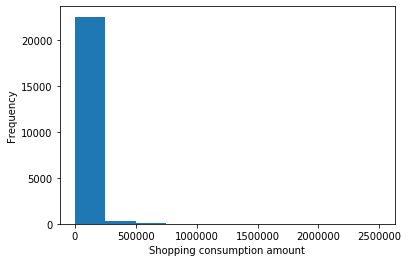

In [28]:
plt.hist(shop)
plt.xlabel("Shopping consumption amount")
plt.ylabel("Frequency")
plt.show()

In [29]:
#윌콕슨 순위합 검정(Wilcoxon rank sum test)  
  
#데이터가 0이 과도하게 많은 상태 --> 데이터 분포가 normal distribution을 따르지 않음 --> t-test 불가
#mean 대신 median을 사용하는 rank sum test 활용

# H0: 2019년 shopping 중간값과 2020 shopping 중간 값이 동일하다

stat, p = stats.ranksums(df_2019_test['Shopping'], df_2020_test['Shopping'])
print("Shopping p-value: {}".format(p/2))
stat, p = stats.ranksums(df_2019_test['Food'], df_2020_test['Food'])
print("Food p-value: {}".format(p/2))
stat, p = stats.ranksums(df_2019_test['Accommodation'], df_2020_test['Accommodation'])
print("Accommodation p-value: {}".format(p/2))
stat, p = stats.ranksums(df_2019_test['Transportation'], df_2020_test['Transportation'])
print("Transportation p-value: {}".format(p/2))
stat, p = stats.ranksums(df_2019_test['Activity'], df_2020_test['Activity'])
print("Activity p-value: {}".format(p/2))
stat, p = stats.ranksums(df_2019_test['Etc'], df_2020_test['Etc'])
print("Etc p-value: {}".format(p/2))
stat, p = stats.ranksums(df_2019_test['All'], df_2020_test['All'])
print("All p-value: {}".format(p/2))

Shopping p-value: 0.0010750677061267557
Food p-value: 1.0929695324555809e-14
Accommodation p-value: 1.8099148920092313e-09
Transportation p-value: 6.908370920053581e-16
Activity p-value: 2.2300928131690382e-40
Etc p-value: 0.2857583659320528
All p-value: 7.809475780806114e-08


-----------------

# Decision Tree Model - destination reason

## 2019

In [30]:
df_2019 = pd.read_csv("DestinationReason_2019.csv")
df_2019 = df_2019.set_index('ID')
df_2019

education level  marriage  work  gender  age  family  \
ID                                                                          
11010550341_1000000                6         1     1     1.0  3.0     1.0   
11010550341_1000005                6         2     1     1.0  5.0     3.0   
11010550341_1000007                6         1     2     1.0  1.0     3.0   
11010550341_1000012                6         2     1     1.0  4.0     3.0   
11010550341_1000013                6         3     2     1.0  6.0     1.0   
...                              ...       ...   ...     ...  ...     ...   
39020620091_1382329                4         2     1     2.0  5.0     3.0   
39020620091_1382420                5         1     1     2.0  3.0     3.0   
39020620091_1382421                4         1     1     2.0  1.0     3.0   
39020620091_1382423                4         2     1     1.0  3.0     3.0   
39020620091_1382424                6         2     1     2.0  4.0     3.0   

                     reason  
ID                           
11010550341_1000000       1  
11010550341_1000005      14  
11010550341_1000007       2  
11010550341_1000012       9  
11010550341_1000013       2  
...                     ...  
39020620091_1382329  #NULL!  
39020620091_1382420  #NULL!  
39020620091_1382421       3  
39020620091_1382423  #NULL!  
39020620091_1382424  #NULL!  

[48269 rows x 7 columns]

In [31]:
# 여행지 이유가 null 값인 데이터 삭제
# 학력 삭제
idx_null_2019 = df_2019[df_2019['reason']=='#NULL!'].index
df_2019 = df_2019.drop(idx_null_2019)
df_2019 = df_2019.drop('education level', axis = 1)
df_2019

marriage  work  gender  age  family reason
ID                                                             
11010550341_1000000         1     1     1.0  3.0     1.0      1
11010550341_1000005         2     1     1.0  5.0     3.0     14
11010550341_1000007         1     2     1.0  1.0     3.0      2
11010550341_1000012         2     1     1.0  4.0     3.0      9
11010550341_1000013         3     2     1.0  6.0     1.0      2
...                       ...   ...     ...  ...     ...    ...
39020600401_1319375         2     1     1.0  5.0     2.0      4
3902061022A_1382196         1     2     2.0  2.0     3.0      3
3902061022A_1382200         2     1     2.0  5.0     3.0      2
39020620091_1382242         1     2     1.0  1.0     3.0     13
39020620091_1382421         1     1     2.0  1.0     3.0      3

[22898 rows x 6 columns]

In [32]:
# marriage column: 1 - 미혼, 이혼, 사별, 기타 / 2 - 기혼
df_2019['marriage'] = df_2019['marriage'].replace(3, 1)
df_2019['marriage'] = df_2019['marriage'].replace(4, 1)
df_2019['marriage'] = df_2019['marriage'].replace(5, 1)

# work column: 1 - 근로 O / 2 - 근로 X
# gender column: 1 - 남 / 2 - 여
# age column: 1 - 15~39세 / 2 - 40세 이상
df_2019['age'] = df_2019['age'].replace(2, 1)
df_2019['age'] = df_2019['age'].replace(3, 1)
df_2019['age'] = df_2019['age'].replace(4, 2)
df_2019['age'] = df_2019['age'].replace(5, 2)
df_2019['age'] = df_2019['age'].replace(6, 2)
df_2019['age'] = df_2019['age'].replace(7, 2)

# family column: 1 - 1인 가구 / 2 - 2인 이상
df_2019['family'] = df_2019['family'].replace(3, 2)

df_2019

marriage  work  gender  age  family reason
ID                                                             
11010550341_1000000         1     1     1.0  1.0     1.0      1
11010550341_1000005         2     1     1.0  2.0     2.0     14
11010550341_1000007         1     2     1.0  1.0     2.0      2
11010550341_1000012         2     1     1.0  2.0     2.0      9
11010550341_1000013         1     2     1.0  2.0     1.0      2
...                       ...   ...     ...  ...     ...    ...
39020600401_1319375         2     1     1.0  2.0     2.0      4
3902061022A_1382196         1     2     2.0  1.0     2.0      3
3902061022A_1382200         2     1     2.0  2.0     2.0      2
39020620091_1382242         1     2     1.0  1.0     2.0     13
39020620091_1382421         1     1     2.0  1.0     2.0      3

[22898 rows x 6 columns]

In [33]:
df_2019['reason'].value_counts()

2     4794
1     3952
14    2317
4     2279
5     2278
8     1807
11    1318
3     1221
9      773
12     531
6      523
15     336
7      334
13     224
10     211
Name: reason, dtype: int64

In [34]:
#training/test dataset 분리
x_2019 = df_2019.drop('reason', axis = 1)
y_2019 = df_2019['reason']

X_train_2019, X_test_2019, y_train_2019, y_test_2019 = train_test_split(x_2019, y_2019, test_size=0.3, stratify=y_2019, random_state=0)

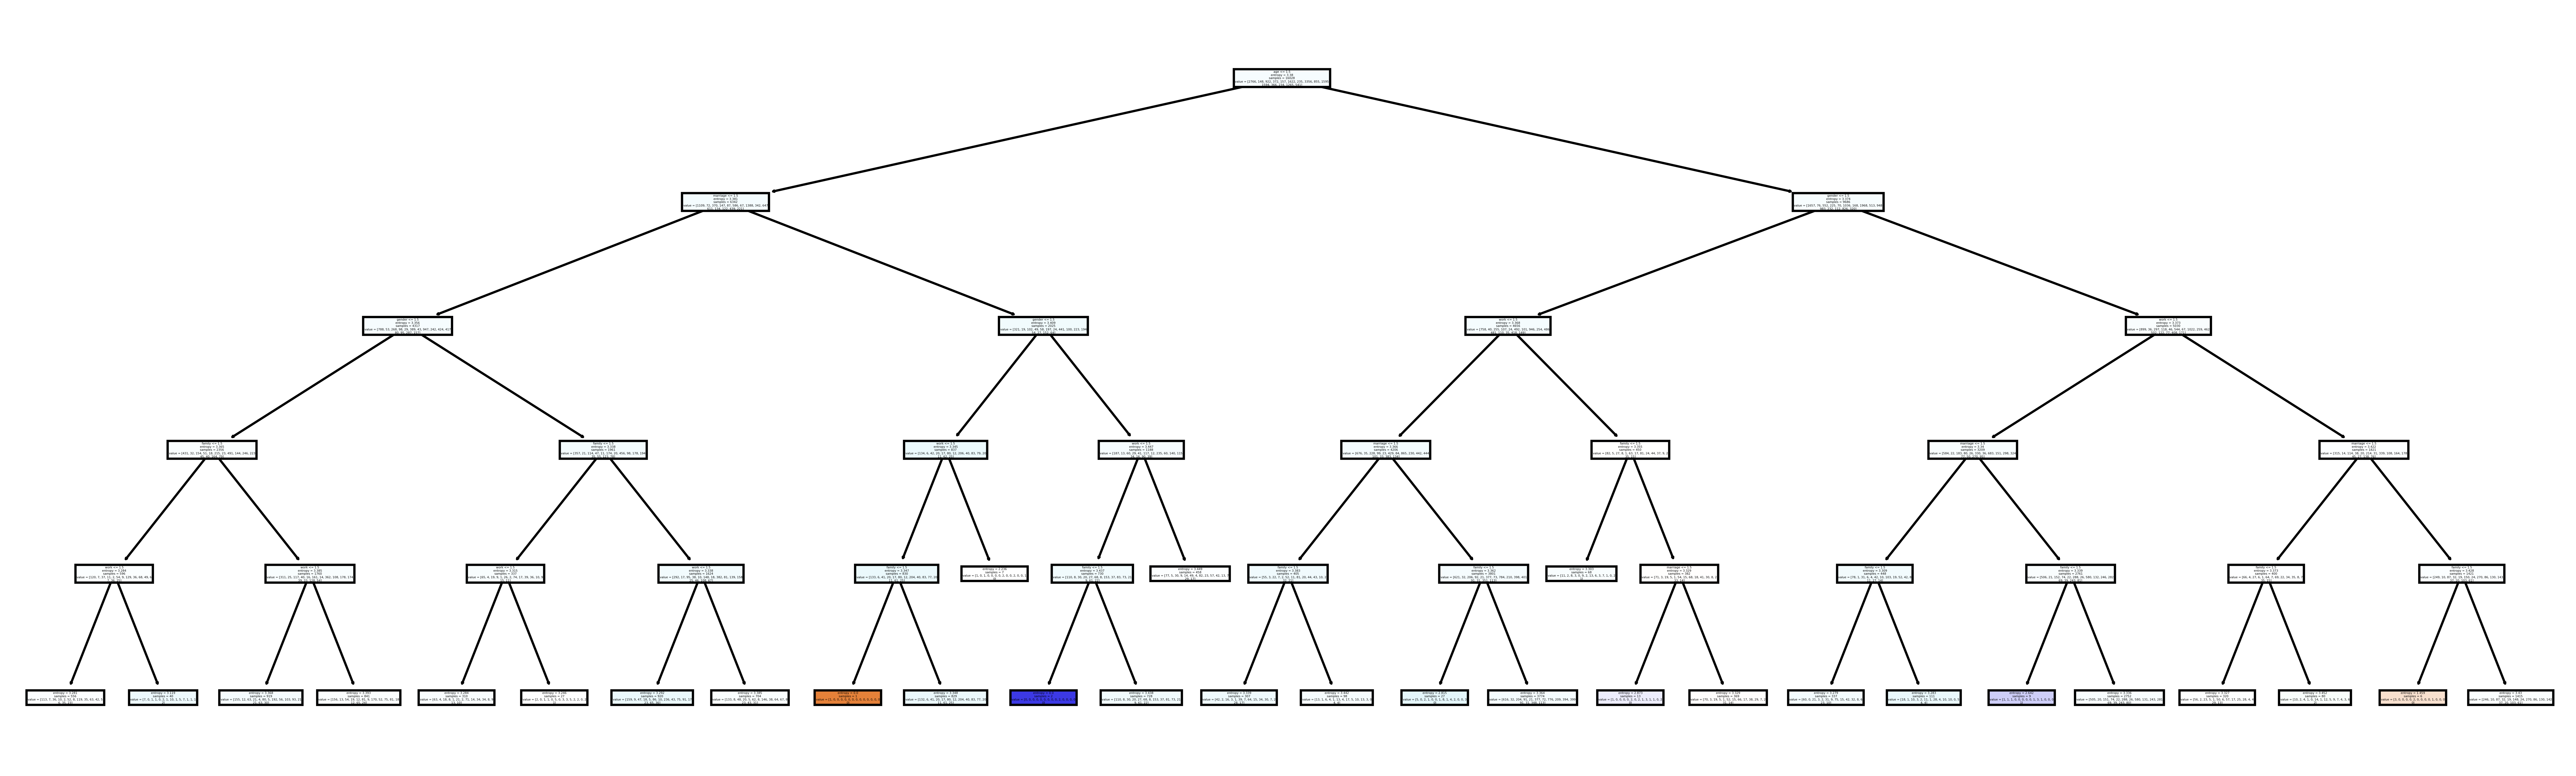

In [35]:
#트리 구성
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train_2019, y_train_2019)

plt.figure(figsize=(20, 6), dpi=600)
tree_dot = plot_tree(tree, feature_names=['marriage', 'work', 'gender', 'age', 'family'], filled=True)
plt.savefig("mpl_tree_plot.png")

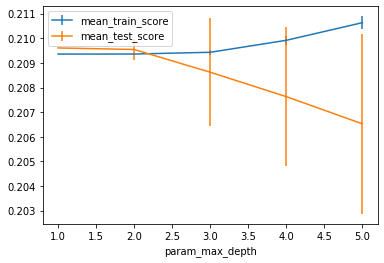

In [36]:
# 최적의 max_depth 찾기
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
param_grid = {'max_depth':range(1, 6)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=StratifiedShuffleSplit(100), return_train_score=True)
grid.fit(X_train_2019, y_train_2019)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())
plt.savefig("grid_max_depth.png")

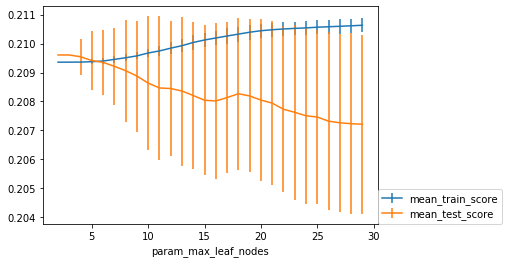

In [37]:
#최적의 max leaf node 찾기
from sklearn.model_selection import GridSearchCV
param_grid = {'max_leaf_nodes':range(2, 30)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=StratifiedShuffleSplit(100, random_state=1), return_train_score=True)
grid.fit(X_train_2019, y_train_2019)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_leaf_nodes', y='mean_test_score', yerr='std_test_score', ax=plt.gca())
plt.legend(loc=(1, 0))
plt.savefig("grid_max_leaf_nodes.png")

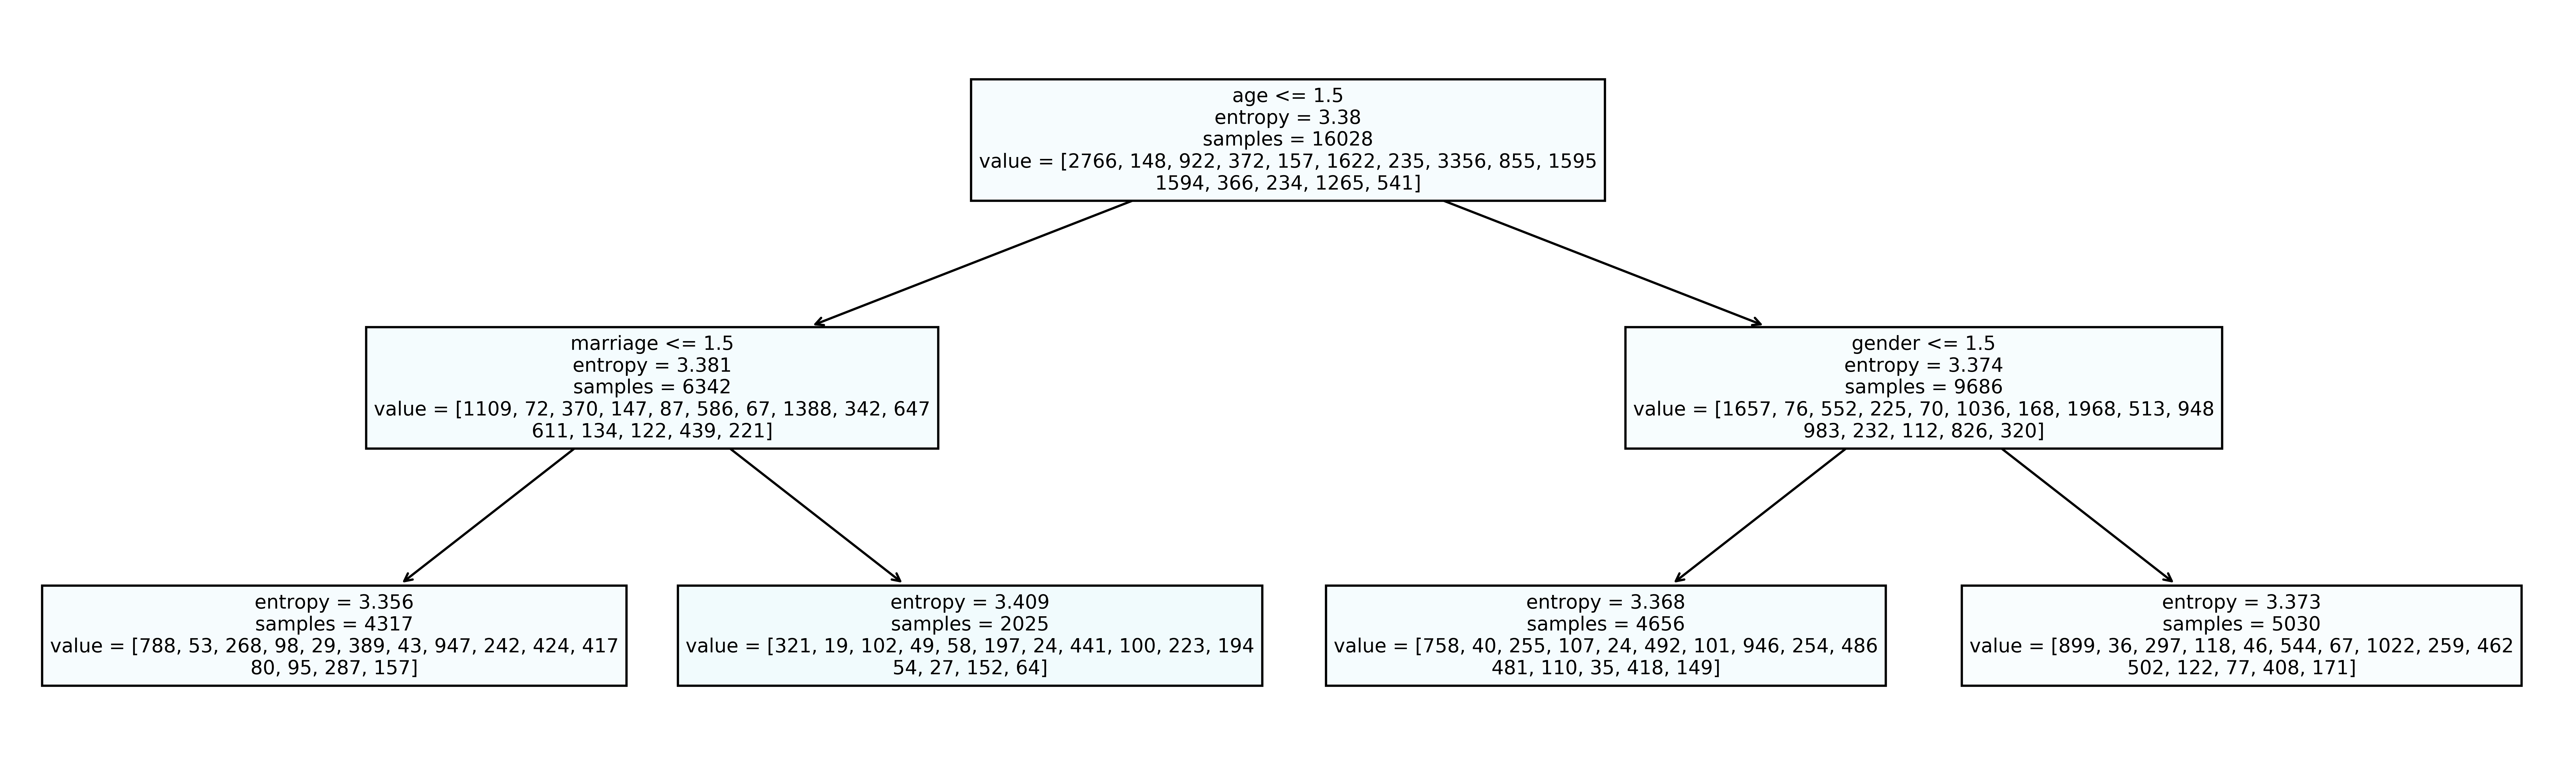

In [38]:
#최적의 max_depth로 구성한 트리
tree = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree.fit(X_train_2019, y_train_2019)

plt.figure(figsize=(20, 6), dpi=600)
tree_dot = plot_tree(tree, feature_names=['marriage', 'work', 'gender', 'age', 'family'], filled=True)
plt.savefig("mpl_tree_plot_depth.png")

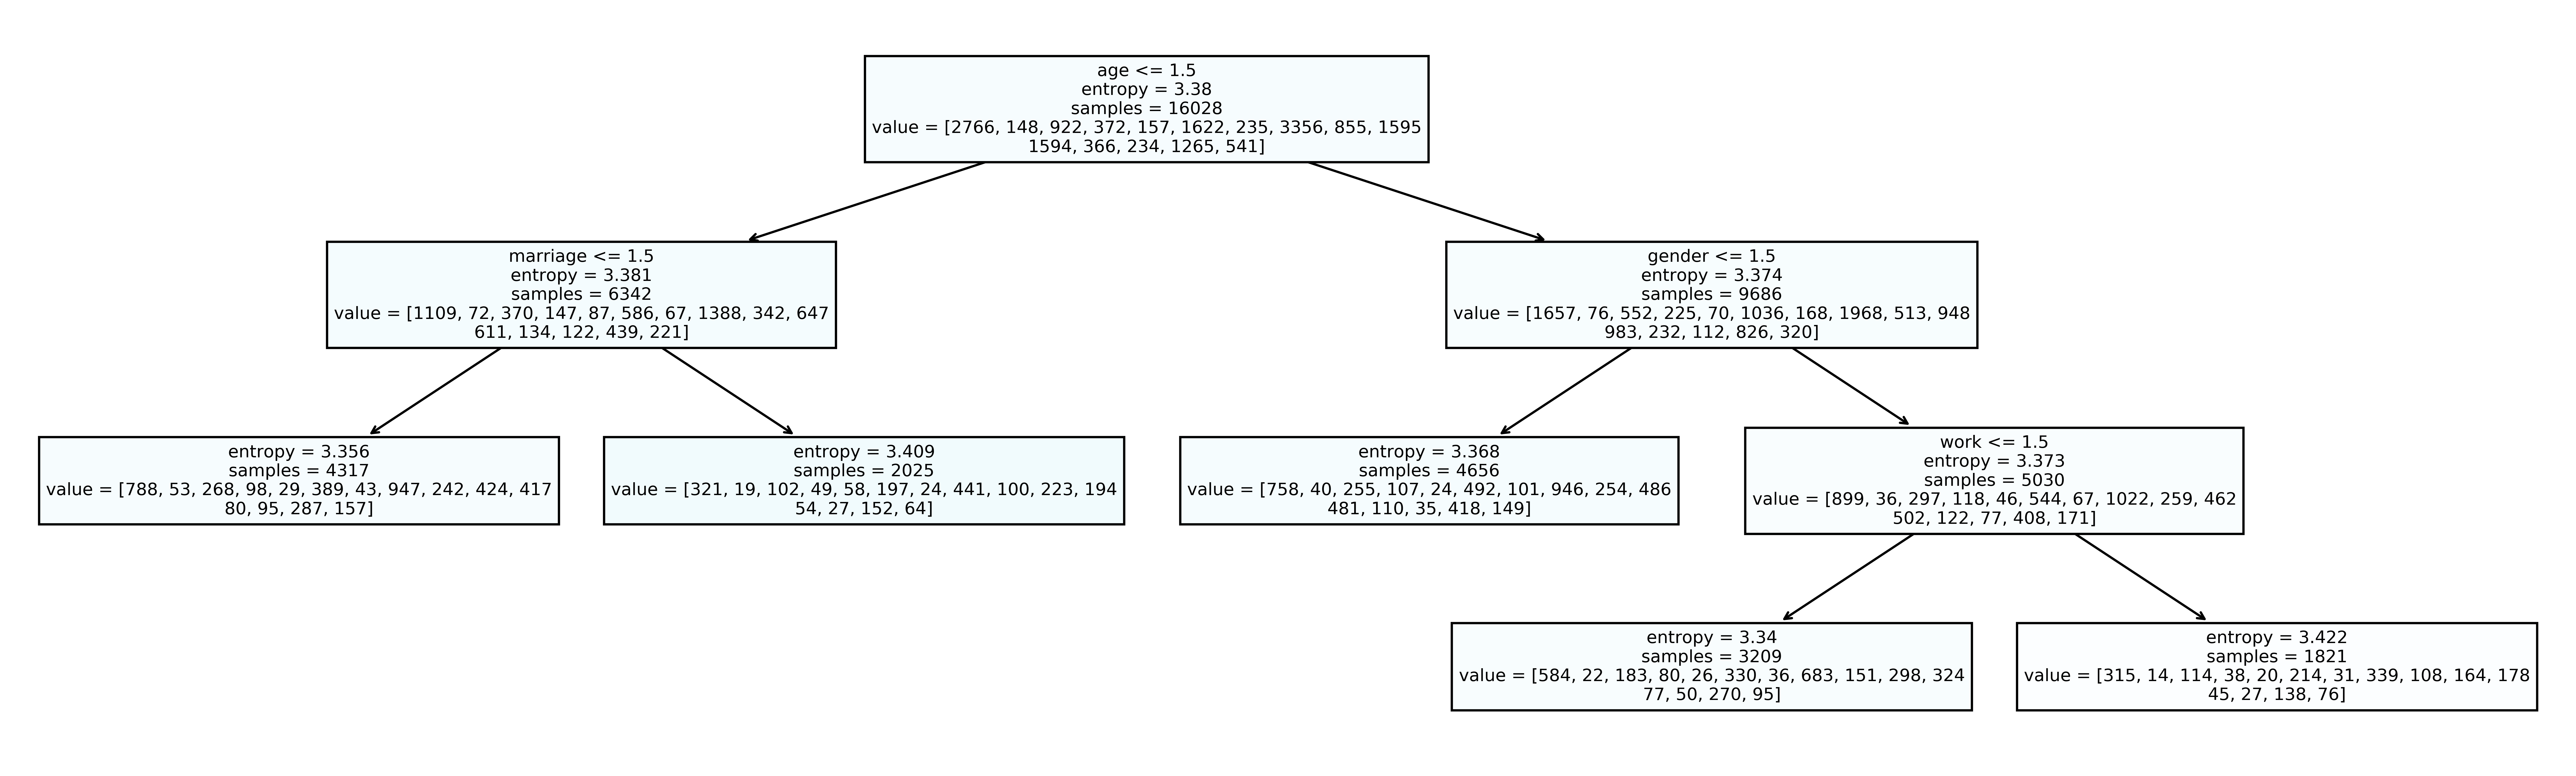

In [39]:
#최적의 max leaf node로 구성한 트리
tree = DecisionTreeClassifier(max_leaf_nodes=5, criterion='entropy')
tree.fit(X_train_2019, y_train_2019)

plt.figure(figsize=(20, 6), dpi=600)
tree_dot = plot_tree(tree, feature_names=['marriage', 'work', 'gender', 'age', 'family'], filled=True)
plt.savefig("mpl_tree_plot_leaf.png")

In [40]:
df_2019 = pd.read_csv("DestinationReason_2019.csv")
df_2019 = df_2019.set_index('ID')
df_2019

education level  marriage  work  gender  age  family  \
ID                                                                          
11010550341_1000000                6         1     1     1.0  3.0     1.0   
11010550341_1000005                6         2     1     1.0  5.0     3.0   
11010550341_1000007                6         1     2     1.0  1.0     3.0   
11010550341_1000012                6         2     1     1.0  4.0     3.0   
11010550341_1000013                6         3     2     1.0  6.0     1.0   
...                              ...       ...   ...     ...  ...     ...   
39020620091_1382329                4         2     1     2.0  5.0     3.0   
39020620091_1382420                5         1     1     2.0  3.0     3.0   
39020620091_1382421                4         1     1     2.0  1.0     3.0   
39020620091_1382423                4         2     1     1.0  3.0     3.0   
39020620091_1382424                6         2     1     2.0  4.0     3.0   

                     reason  
ID                           
11010550341_1000000       1  
11010550341_1000005      14  
11010550341_1000007       2  
11010550341_1000012       9  
11010550341_1000013       2  
...                     ...  
39020620091_1382329  #NULL!  
39020620091_1382420  #NULL!  
39020620091_1382421       3  
39020620091_1382423  #NULL!  
39020620091_1382424  #NULL!  

[48269 rows x 7 columns]

In [41]:
# 여행지 이유가 null 값인 데이터 삭제
# 학력 삭제
idx_null_2019 = df_2019[df_2019['reason']=='#NULL!'].index
df_2019 = df_2019.drop(idx_null_2019)
df_2019 = df_2019.drop('education level', axis = 1)
df_2019

marriage  work  gender  age  family reason
ID                                                             
11010550341_1000000         1     1     1.0  3.0     1.0      1
11010550341_1000005         2     1     1.0  5.0     3.0     14
11010550341_1000007         1     2     1.0  1.0     3.0      2
11010550341_1000012         2     1     1.0  4.0     3.0      9
11010550341_1000013         3     2     1.0  6.0     1.0      2
...                       ...   ...     ...  ...     ...    ...
39020600401_1319375         2     1     1.0  5.0     2.0      4
3902061022A_1382196         1     2     2.0  2.0     3.0      3
3902061022A_1382200         2     1     2.0  5.0     3.0      2
39020620091_1382242         1     2     1.0  1.0     3.0     13
39020620091_1382421         1     1     2.0  1.0     3.0      3

[22898 rows x 6 columns]

In [42]:
#dummies 활용
df_2019_dum = pd.get_dummies(df_2019, columns = ['marriage', 'work', 'gender', 'age', 'family'])
df_2019_dum

reason  marriage_1  marriage_2  marriage_3  marriage_4  \
ID                                                                           
11010550341_1000000      1           1           0           0           0   
11010550341_1000005     14           0           1           0           0   
11010550341_1000007      2           1           0           0           0   
11010550341_1000012      9           0           1           0           0   
11010550341_1000013      2           0           0           1           0   
...                    ...         ...         ...         ...         ...   
39020600401_1319375      4           0           1           0           0   
3902061022A_1382196      3           1           0           0           0   
3902061022A_1382200      2           0           1           0           0   
39020620091_1382242     13           1           0           0           0   
39020620091_1382421      3           1           0           0           0   

                     marriage_5  work_1  work_2  gender_1.0  gender_2.0  \
ID                                                                        
11010550341_1000000           0       1       0           1           0   
11010550341_1000005           0       1       0           1           0   
11010550341_1000007           0       0       1           1           0   
11010550341_1000012           0       1       0           1           0   
11010550341_1000013           0       0       1           1           0   
...                         ...     ...     ...         ...         ...   
39020600401_1319375           0       1       0           1           0   
3902061022A_1382196           0       0       1           0           1   
3902061022A_1382200           0       1       0           0           1   
39020620091_1382242           0       0       1           1           0   
39020620091_1382421           0       1       0           0           1   

                     age_1.0  age_2.0  age_3.0  age_4.0  age_5.0  age_6.0  \
ID                                                                          
11010550341_1000000        0        0        1        0        0        0   
11010550341_1000005        0        0        0        0        1        0   
11010550341_1000007        1        0        0        0        0        0   
11010550341_1000012        0        0        0        1        0        0   
11010550341_1000013        0        0        0        0        0        1   
...                      ...      ...      ...      ...      ...      ...   
39020600401_1319375        0        0        0        0        1        0   
3902061022A_1382196        0        1        0        0        0        0   
3902061022A_1382200        0        0        0        0        1        0   
39020620091_1382242        1        0        0        0        0        0   
39020620091_1382421        1        0        0        0        0        0   

                     age_7.0  family_1.0  family_2.0  family_3.0  
ID                                                                
11010550341_1000000        0           1           0           0  
11010550341_1000005        0           0           0           1  
11010550341_1000007        0           0           0           1  
11010550341_1000012        0           0           0           1  
11010550341_1000013        0           1           0           0  
...                      ...         ...         ...         ...  
39020600401_1319375        0           0           1           0  
3902061022A_1382196        0           0           0           1  
3902061022A_1382200        0           0           0           1  
39020620091_1382242        0           0           0           1  
39020620091_1382421        0           0           0           1  

[22898 rows x 20 columns]

In [43]:
#training/test dataset 분리
x_2019 = df_2019_dum.drop('reason', axis = 1)
y_2019 = df_2019_dum['reason']

X_train_2019, X_test_2019, y_train_2019, y_test_2019 = train_test_split(x_2019, y_2019, test_size=0.3, stratify=y_2019, random_state=123)

In [44]:
column_list = list(df_2019_dum.columns)

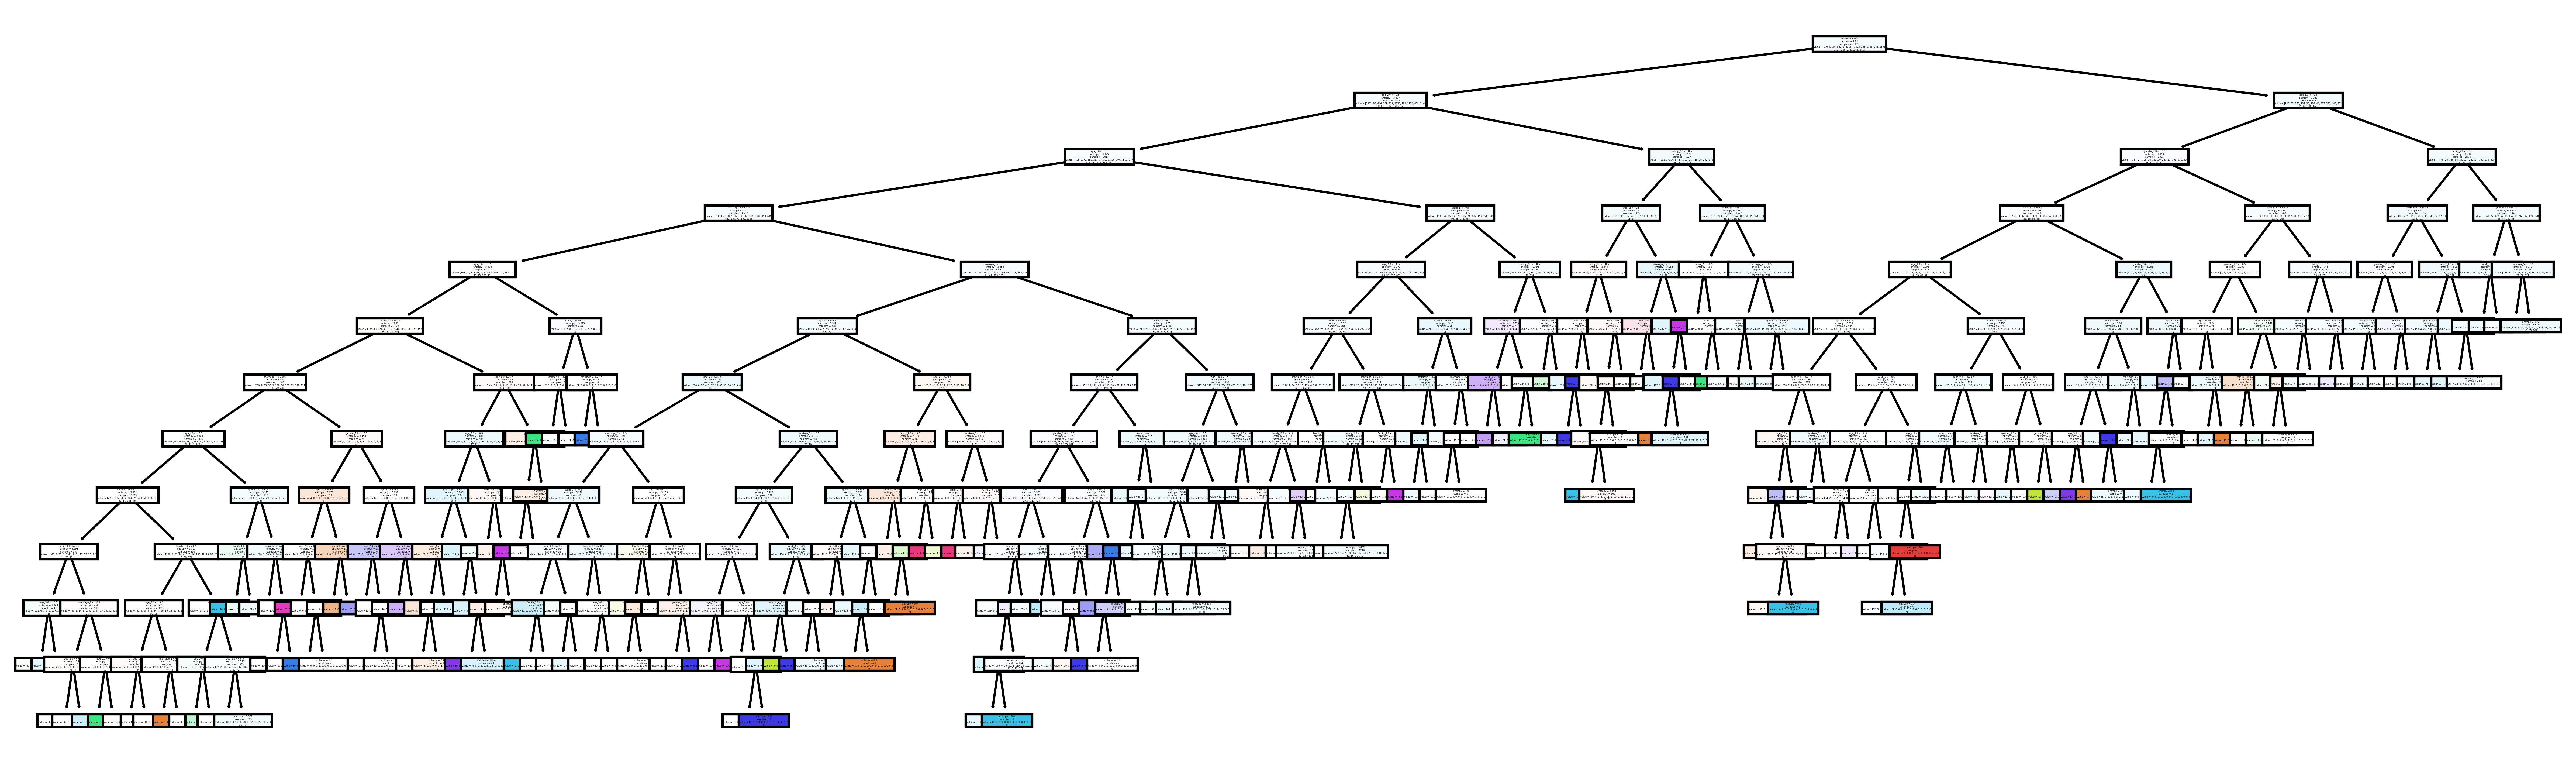

In [45]:
# 트리 구성
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train_2019, y_train_2019)

plt.figure(figsize=(20, 6), dpi=600)
tree_dot = plot_tree(tree, feature_names= column_list, filled=True)
plt.savefig("mpl_tree_plot_cate.png")

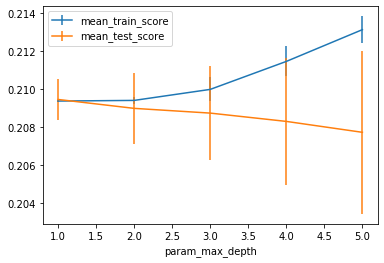

In [46]:
# 최적의 max_depth 찾기
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
param_grid = {'max_depth':range(1, 6)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=123), param_grid=param_grid, cv=StratifiedShuffleSplit(100), return_train_score=True)
grid.fit(X_train_2019, y_train_2019)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())
plt.savefig("grid_max_depth_cate.png")

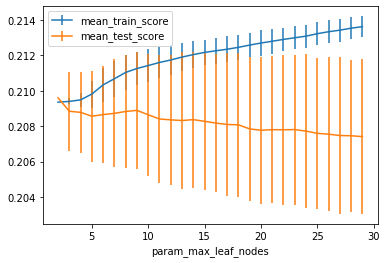

In [47]:
# 최적의 max_leaf_node 찾기
from sklearn.model_selection import GridSearchCV
param_grid = {'max_leaf_nodes':range(2, 30)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=123), param_grid=param_grid, cv=StratifiedShuffleSplit(100, random_state=1), return_train_score=True)
grid.fit(X_train_2019, y_train_2019)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_leaf_nodes', y='mean_test_score', yerr='std_test_score', ax=plt.gca())
plt.savefig("grid_max_leaf_nodes_cate.png")

-----------------

## 2020

In [48]:
df_2020 = pd.read_csv("DestinationReason_2020.csv")
df_2020 = df_2020.set_index('ID')
df_2020

education level  marriage  work  gender  age  family  \
ID                                                                         
11010530201_1                     4         3     1     2.0  6.0     2.0   
11010530201_10                    4         2     1     1.0  6.0     2.0   
11010530201_17                    4         1     2     2.0  1.0     3.0   
11010530201_2                     6         2     1     1.0  4.0     3.0   
11010530201_22                    4         2     1     2.0  5.0     3.0   
...                             ...       ...   ...     ...  ...     ...   
39020620231_345550                6         2     1     2.0  3.0     3.0   
39020620231_345551                3         2     1     2.0  6.0     2.0   
39020620231_345582                6         2     1     1.0  3.0     3.0   
39020620231_345590                5         2     1     1.0  4.0     3.0   
39020620231_345591                6         2     1     2.0  4.0     3.0   

                    reason  
ID                          
11010530201_1       #NULL!  
11010530201_10      #NULL!  
11010530201_17           5  
11010530201_2       #NULL!  
11010530201_22      #NULL!  
...                    ...  
39020620231_345550  #NULL!  
39020620231_345551  #NULL!  
39020620231_345582  #NULL!  
39020620231_345590  #NULL!  
39020620231_345591  #NULL!  

[50710 rows x 7 columns]

In [49]:
# 여행지 이유가 null 값인 데이터 삭제
idx_null_2020 = df_2020[df_2020['reason']=='#NULL!'].index
df_2020 = df_2020.drop(idx_null_2020)
df_2020

education level  marriage  work  gender  age  family  \
ID                                                                         
11010530201_17                    4         1     2     2.0  1.0     3.0   
11010530201_9                     6         1     1     1.0  2.0     1.0   
11010560051_29800                 6         2     1     1.0  5.0     3.0   
11010560051_29803                 4         1     1     2.0  1.0     3.0   
11010560051_29835                 6         1     1     2.0  3.0     1.0   
...                             ...       ...   ...     ...  ...     ...   
3902058033A_288916                5         2     1     2.0  3.0     3.0   
39020590071_172926                6         2     1     1.0  7.0     2.0   
39020590321_202105                6         2     1     1.0  3.0     3.0   
39020590321_202605                5         1     2     2.0  4.0     1.0   
3902059058A_344813                5         2     1     2.0  5.0     2.0   

                   reason  
ID                         
11010530201_17          5  
11010530201_9           9  
11010560051_29800       2  
11010560051_29803      12  
11010560051_29835       9  
...                   ...  
3902058033A_288916      2  
39020590071_172926     15  
39020590321_202105      4  
39020590321_202605      2  
3902059058A_344813      2  

[15592 rows x 7 columns]